<a href="https://colab.research.google.com/github/Zenith40/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_V_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [38]:
# Define the ticker symbol
ticker = 'AAPL'

# Get historical market data
df = yf.download(ticker, start='2008-01-01', end= datetime.datetime.now().strftime('%Y-%m-%d'))

[*********************100%***********************]  1 of 1 completed


In [39]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2008-01-02,5.863436,6.026544,5.794523,5.996752,1079178800
2008-01-03,5.866145,5.940175,5.798736,5.880590,842066400
2008-01-04,5.418352,5.808064,5.383444,5.761419,1455832000
2008-01-07,5.345825,5.525183,5.122831,5.454463,2072193200
2008-01-08,5.153529,5.490878,5.139987,5.421060,1523816000


In [40]:
df.reset_index().iloc[-1,0].strftime('%Y-%m-%d')

'2025-02-13'

In [41]:
df = df.reset_index()

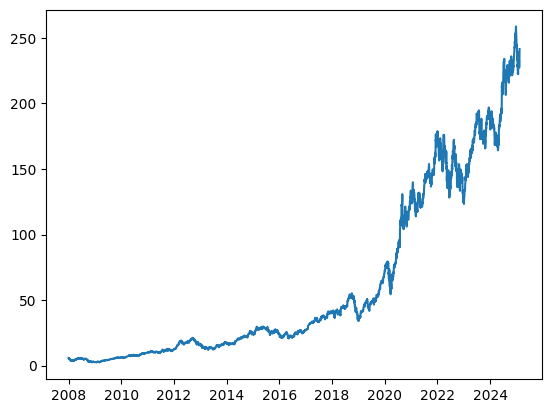

In [42]:
plt.plot(df.Date,df.Close)

In [43]:
# 100 & 200 Days Movingg Average
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

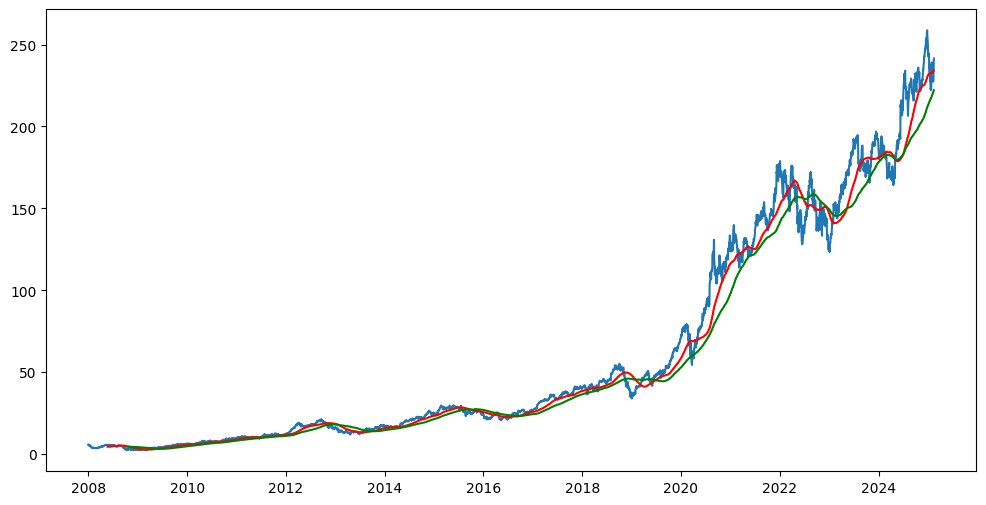

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma100,'r')
plt.plot(df.Date,ma200,'g')

In [45]:
df.shape

(4308, 6)

In [46]:
# Splitting Data into Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3015, 1)
(1293, 1)


In [47]:
# Scaling Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [48]:
data_training_array = scaler.fit_transform(data_training)

In [49]:
data_training_array[0:11]

array([[0.05356081],
       [0.05360214],
       [0.04676928],
       [0.04566259],
       [0.04272834],
       [0.04647078],
       [0.04583711],
       [0.0433896 ],
       [0.0461861 ],
       [0.04171351],
       [0.03739707]])

In [50]:
data_training_array[10,0]

0.03739707179592065

In [51]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [52]:
x_train.shape

(2915, 100, 1)

In [53]:
#ML Model

In [54]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - loss: 0.0460
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0054
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - loss: 0.0038
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 317ms/step - loss: 0.0035
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 301ms/step - loss: 0.0034
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 321ms/step - loss: 0.0027
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - loss: 0.0027
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 313ms/step - loss: 0.0028
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 304ms/step - loss: 0.0028
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 313ms/step - loss: 0.0027
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 302ms/step - loss: 0.0025
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - loss: 0.0027
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - loss: 0.0021
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - loss: 0.0018
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 

In [58]:
model.save('keras_model.h5')

In [59]:
past_100_days = data_training.tail(100)

In [60]:
data_testing

Ticker,AAPL
3015,68.757675
3016,68.823029
3017,70.188507
3018,70.161880
3019,70.578278
...,...
4303,227.380005
4304,227.649994
4305,232.619995
4306,236.869995


In [61]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [62]:
final_df

Ticker,AAPL
0,50.120342
1,49.059906
2,46.491730
3,47.371822
4,47.862366
...,...
1388,227.380005
1389,227.649994
1390,232.619995
1391,236.869995


In [123]:
# Scaling Testing Data

input_data = scaler.fit_transform(final_df)

In [124]:
input_data.shape

(1393, 1)

In [125]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)

In [127]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step


In [128]:
scaler.scale_

array([0.00471156])

In [129]:
#scale_factor = 1/0.00471156
#y_predicted = y_predicted*scale_factor
#y_test = y_test*scale_factor

In [130]:
y_predicted = scaler.inverse_transform(np.array(y_predicted).reshape(-1,1))
y_test = scaler.inverse_transform(np.array(y_test).reshape(-1,1))

In [131]:
y_predicted

array([[ 67.91952 ],
       [ 68.1247  ],
       [ 68.347305],
       ...,
       [237.56914 ],
       [236.89154 ],
       [236.36942 ]], dtype=float32)

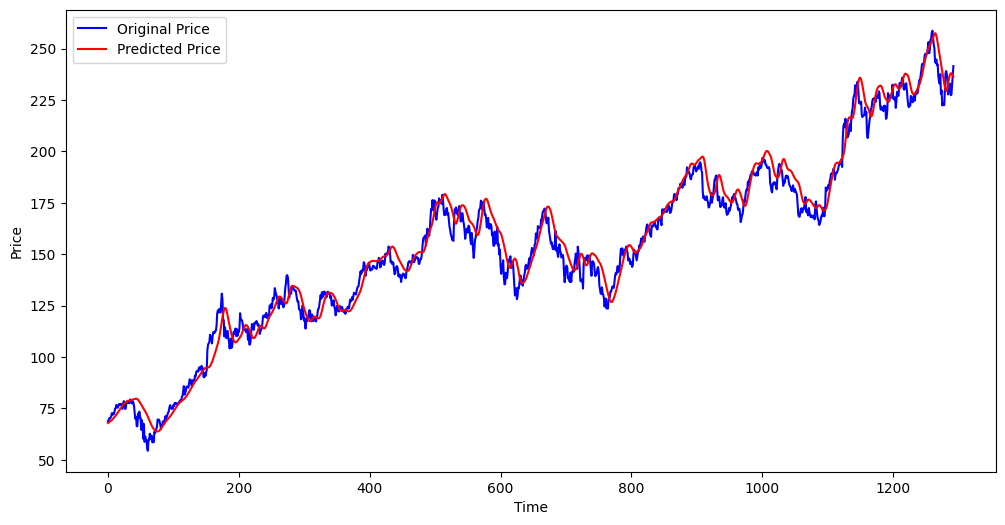

In [132]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [133]:
final_df.tail(100)

Ticker,AAPL
1293,227.698853
1294,225.972656
1295,226.870682
1296,225.872879
1297,227.020355
...,...
1388,227.380005
1389,227.649994
1390,232.619995
1391,236.869995


In [134]:
tomorrow = scaler.transform(final_df.tail(100))

In [135]:
tomorrow

array([[0.85376885],
       [0.84563576],
       [0.84986687],
       [0.84516566],
       [0.85057207],
       [0.85184133],
       [0.87633476],
       [0.84441352],
       [0.84709317],
       [0.84187477],
       [0.84718721],
       [0.82316396],
       [0.84234495],
       [0.86006852],
       [0.85771792],
       [0.85071312],
       [0.86834266],
       [0.88033078],
       [0.87059923],
       [0.87233867],
       [0.88573711],
       [0.89269496],
       [0.88978022],
       [0.86580398],
       [0.86491086],
       [0.86885978],
       [0.87821519],
       [0.87948453],
       [0.86270116],
       [0.84300312],
       [0.82889942],
       [0.82466832],
       [0.8314381 ],
       [0.82800622],
       [0.85038399],
       [0.84911329],
       [0.83626483],
       [0.83626483],
       [0.84045352],
       [0.85504336],
       [0.83988873],
       [0.85410207],
       [0.85532569],
       [0.85871428],
       [0.85645526],
       [0.86280886],
       [0.87692802],
       [0.887

In [136]:
#tomorrow.reshape(1,100,1)

In [153]:
x =model.predict(tomorrow.reshape(1,100,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [154]:
x

array([[0.8945979]], dtype=float32)

In [155]:
scaler.inverse_transform(x)[0][0]

236.36456

In [139]:
#y= scaler.scale_

In [140]:
#x[0][0]/y[0]

189.8728323304531

In [141]:
#y[0]

0.004711563402793235

In [142]:
#yf.download(ticker, start='2008-01-01', end= datetime.datetime.now().strftime('%Y-%m-%d')).tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
2025-02-11,232.619995,235.229996,228.130005,228.199997,53718400
2025-02-12,236.869995,236.960007,230.679993,231.199997,45243300
2025-02-13,241.529999,242.339996,235.570007,236.910004,53614100


In [143]:
np.array(df.Close.tail(1))[0][0]

241.52999877929688

In [144]:
np.array(final_df.tail(1))

array([[241.52999878]])

In [145]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
4303,2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
4304,2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
4305,2025-02-11,232.619995,235.229996,228.130005,228.199997,53718400
4306,2025-02-12,236.869995,236.960007,230.679993,231.199997,45243300
4307,2025-02-13,241.529999,242.339996,235.570007,236.910004,53614100


In [146]:
y_test[-1]

array([241.52999878])

In [147]:
y_predicted[-1][0]

236.36942

In [152]:
print(f" * {df.iloc[-1,0].strftime('%Y-%m-%d')} : {np.around(np.array(final_df.tail(1))[0][0],2)}")
print(f" * {df.iloc[-1,0].strftime('%Y-%m-%d')} prediction Value : {np.around(y_predicted[-1][0],2)}")
print(f" * Offset : {np.around((np.array(final_df.tail(1))[0][0])-(y_predicted[-1][0]),2)}")
print(f" * Prediction for tomorrow : {np.around(scaler.inverse_transform(x)[0][0],2)}")

 * 2025-02-13 : 241.53
 * 2025-02-13 prediction Value : 236.3699951171875
 * Offset : 5.16
 * Prediction for tomorrow : 236.36000061035156


In [161]:
print(f" Prediction Value with offset : {np.around((scaler.inverse_transform(x)[0][0])+((np.array(final_df.tail(1))[0][0])-(y_predicted[-1][0])),2)}")

 Prediction Value with offset : 241.53


In [87]:
# Merge with LSTM code & give prdiction on streamlit